<a href="https://colab.research.google.com/github/Hikachhu/ProgGPU/blob/main/TD3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyse des donnée

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
import time
import statistics
!pip install colorama
from colorama import Fore, Back, Style

simplefilter("ignore", category=ConvergenceWarning)

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

1) Charger la base de données digits disponible sous sklearn.

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

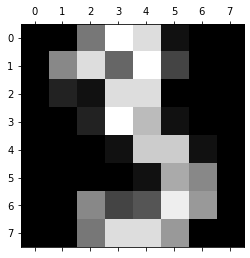

In [3]:
plt.gray()
plt.matshow(digits.images[3]) #index est le numéro de l’image
plt.show()

In [4]:
X = digits.data
y = digits.target

2) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) 
(model_selection.train_test_split).

In [105]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,test_size=0.3)

2. Apprentissage

In [6]:
def train_multi(C,early_stop=False):
  clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0,early_stopping=early_stop)
  clf2.fit(X_train,y_train)
  return clf2

final cost : 0.7488502041072582 / it = 96
final cost : 0.1273389290277332 / it = 100
final cost : 0.09414473847313938 / it = 100
final cost : 0.1148095646688873 / it = 100
final cost : 0.11165270496710696 / it = 100
final cost : 0.15874946099270013 / it = 100
final cost : 0.07073957764305909 / it = 100
final cost : 0.06309733290326192 / it = 100
final cost : 0.057995349154214414 / it = 100


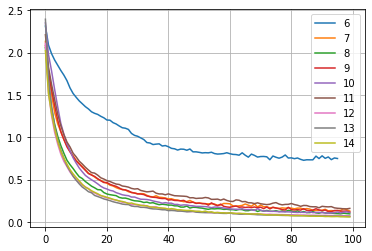

In [121]:
#Prend environ 6m21 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(6,15):
  clf=train_multi(i)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [ ]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.21877486077963404	 test score=0.17037037037037037
i=2 train score=0.38424821002386633	 test score=0.34444444444444444
i=3 train score=0.5934765314240255	 test score=0.5537037037037037
i=4 train score=0.9061256961018298	 test score=0.8037037037037037
i=5 train score=0.8003182179793158	 test score=0.762962962962963
i=6 train score=0.8448687350835322	 test score=0.7462962962962963
i=7 train score=0.9657915672235481	 test score=0.8870370370370371
i=8 train score=0.9713603818615751	 test score=0.8759259259259259
i=9 train score=0.9912490055688147	 test score=0.9


3. Cross-validation


final cost : 1.9053927074062453 / it = 15
final cost : 2.3026636115481276 / it = 12
final cost : 1.86688237734833 / it = 20
final cost : 1.0902946021454651 / it = 23
final cost : 0.7251060658951575 / it = 44
final cost : 0.45366166927010965 / it = 41
final cost : 0.3251573276174651 / it = 63
final cost : 0.4260595073976373 / it = 47
final cost : 0.21385321856464704 / it = 63


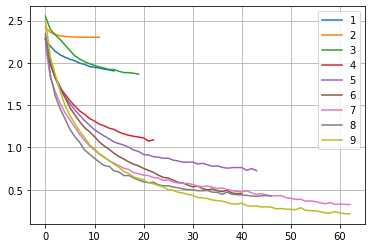

In [8]:
#Prend environ à 2m29 s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))

In [ ]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(i+1,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.2012728719172633	 test score=0.18518518518518517
i=2 train score=0.40652346857597454	 test score=0.3333333333333333
i=3 train score=0.3858392999204455	 test score=0.3388888888888889
i=4 train score=0.7271280827366746	 test score=0.6388888888888888
i=5 train score=0.6817820206841687	 test score=0.6537037037037037
i=6 train score=0.5656324582338902	 test score=0.5166666666666667
i=7 train score=0.8353221957040573	 test score=0.7574074074074074
i=8 train score=0.883054892601432	 test score=0.8074074074074075
i=9 train score=0.9474940334128878	 test score=0.9


final cost : 0.2973618817620691 / it = 39
final cost : 0.6461555360666554 / it = 21
final cost : 0.42452680170999835 / it = 30
final cost : 0.276259935536899 / it = 38
final cost : 0.5853400692832269 / it = 50
final cost : 0.371144312416821 / it = 76
final cost : 0.31019165308765817 / it = 68
final cost : 0.24100574861318222 / it = 73
final cost : 0.5865672316935667 / it = 44
Train mean:0.884292406965438 var:0.002626797735894564
Test mean:0.8565843621399177 var:0.002309183898118513


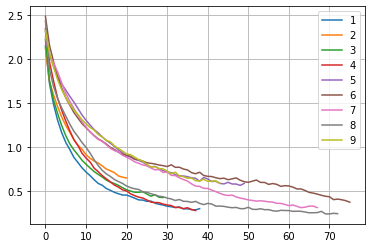

In [61]:
#Prend environ 3min35 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(7,True)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost : {} / it = {}".format(loss_values[-1],len(loss_values)))
print("Train mean:{} var:{}".format(np.mean(clfScoreTrain),np.var(clfScoreTrain)))
print("Test mean:{} var:{}".format(np.mean(clfScoreTest),np.var(clfScoreTest)))

4.Rejet

In [10]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))
    return y_masked.filled(-1)
 
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))
    return y_masked.filled(-1)

In [ ]:
masker=argmax_reject_threshold(clf.predict_proba(X_test),0.5)
unique, counts = np.unique(masker, return_counts=True)
print("{} {}".format(len(masker),dict(zip(unique, counts))[-1]))

540 74


In [11]:
longueurTotal=15
pos=0
tauxReussite=0.5
masker=argmax_reject_threshold(clf.predict_proba(X_test),tauxReussite)
prediction=clf.predict_proba(X_test)[0:longueurTotal]
truncadte=np.array(trunc(np.array(prediction), decs=3))
for i in truncadte:
  here=list(i)
  trie=sorted(here,reverse=True)
  duo=[]
  for a in trie:
    duo.append([here.index(a),a])
  if duo[0][1] < 0.5:
      print(Fore.RED+str(pos)+" "+str(duo[0:3])+Fore.RESET)
  else:
      print(str(pos)+" "+str(duo[0:3]))
  pos+=1

print("\n")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(y_test[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(y_test[i]),end=" ")
print("")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  elif(masker[i] != y_test[i]):
    print(Fore.BLUE+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(masker[i]),end=" ")
print("\n")
unique, counts = np.unique(masker, return_counts=True)
nbrOutput=len(masker)
nbrEchecCuissant=dict(zip(unique, counts))[-1]

print("Il y a en tout {} sorties dont {} avec une valeur max inférieur à {} ce qui fais un score de {}".format(nbrOutput,nbrEchecCuissant,tauxReussite,trunc(nbrEchecCuissant/nbrOutput,6)))

0 [[2, 0.542], [3, 0.389], [9, 0.028]]
1 [[3, 0.642], [2, 0.224], [7, 0.044]]
2 [[0, 0.91], [8, 0.03], [9, 0.024]]
3 [[5, 0.956], [0, 0.012], [0, 0.012]]
4 [[2, 0.947], [3, 0.027], [4, 0.007]]
5 [[2, 0.648], [4, 0.16], [1, 0.072]]
6 [[7, 0.279], [3, 0.242], [8, 0.172]]
7 [[6, 0.541], [2, 0.21], [8, 0.114]]
8 [[9, 0.384], [1, 0.208], [4, 0.172]]
9 [[2, 0.947], [3, 0.027], [4, 0.007]]
10 [[8, 0.789], [4, 0.098], [0, 0.063]]
11 [[2, 0.699], [3, 0.254], [6, 0.022]]
12 [[1, 0.71], [4, 0.165], [8, 0.071]]
13 [[1, 0.843], [4, 0.096], [8, 0.05]]
14 [[9, 0.692], [4, 0.14], [2, 0.11]]


03 02 00 05 02 02 03 08 01 02 08 02 01 01 09 
02 03 00 05 02 02 -1 06 -1 02 08 02 01 01 09 

Il y a en tout 540 sorties dont 34 avec une valeur max inférieur à 0.5 ce qui fais un score de 0.062962


In [113]:
clf=train_multi(7,True)

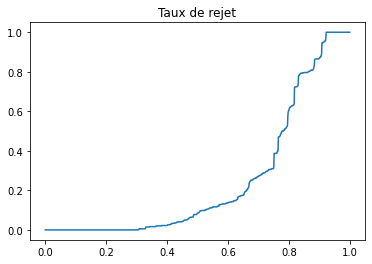

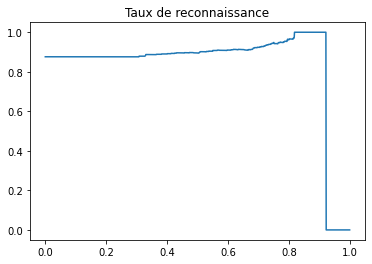

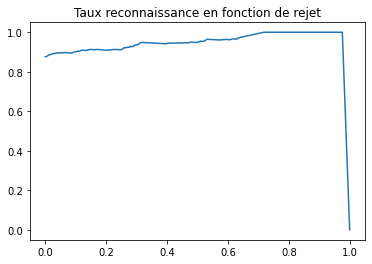

In [120]:
nbrunder=[]
ordonnee=[]
totalRatio=[]
same=[]
prediction=clf.predict_proba(X_test)
for i in np.linspace(0,1,1000,endpoint=False):
  masker=argmax_reject_threshold(prediction,i)
  unique, counts = np.unique(masker, return_counts=True)
  nbrOutput=len(masker)
  try:    
    nbrEchecCuissant=dict(zip(unique, counts))[-1]
    nbrunder.append(nbrEchecCuissant/nbrOutput)
  except Exception as e:
    nbrunder.append(0)
  
  filtrer=[]
  value=[]
  ratio=0
  for z in range(0,len(masker)):
    if(masker[z] != -1):
      filtrer.append(masker[z])
      value.append(y_test[z])
  for z in range(0,len(filtrer)):
    if(filtrer[z]==value[z]):
      same.append(filtrer[z])
      ratio+=1
  if(len(filtrer)==0):
    totalRatio.append(0)
  else:
    totalRatio.append(ratio/len(filtrer))

  ordonnee.append(i)
plt.plot(ordonnee,nbrunder)
plt.title("Taux de rejet")
plt.show()
plt.plot(ordonnee,totalRatio)
plt.title("Taux de reconnaissance")
plt.show()
plt.plot(nbrunder,totalRatio)
plt.title("Taux reconnaissance en fonction de rejet")
plt.show()